In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_set =  '../content/drive/My Drive/data'

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils
from google.colab.patches import cv2_imshow
import easyocr
import re
import pytesseract
import PIL

In [ ]:
labels = open(data_set+'/classes.names').read()
print(labels)

LP



In [ ]:
weights_path = data_set+'/lapi.weights'
configuration_path =data_set+'/darknet-yolov3.cfg'

probability_minimum = 0.5
threshold = 0.3
print(weights_path)

../content/drive/My Drive/data/lapi.weights


In [ ]:
network = cv2.dnn.readNetFromDarknet(configuration_path, weights_path)
layers_names_all = network.getLayerNames()
# layers_names_output = [layers_names_all[i[0] - 1] for i in network.getUnconnectedOutLayers()]
layers_names_output = [layers_names_all[i - 1] for i in network.getUnconnectedOutLayers()]
# layers_names_output = [layers_names_all[i ] for i in network.getUnconnectedOutLayers()]

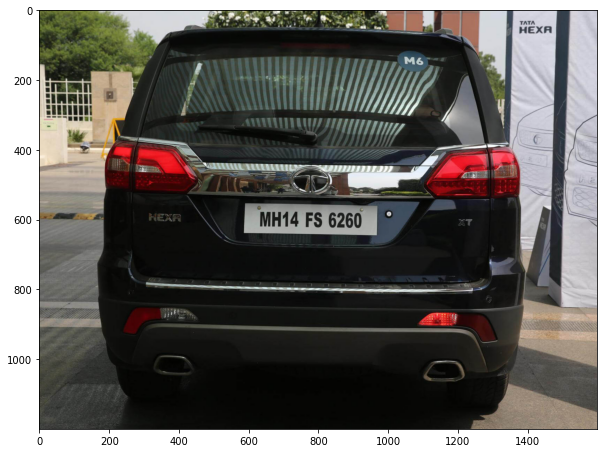

In [ ]:
##############################################

image_input = cv2.imread(data_set+'/2.jpg')


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,10.0)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
blob = cv2.dnn.blobFromImage(image_input, 1/255.0, (416,416), swapRB=True, crop=False)
blob_to_show = blob[0,:,:,:].transpose(1,2,0)
network.setInput(blob)
output_from_network = network.forward(layers_names_output)
np.random.seed(42)
colours = np.random.randint(0, 255, size=(len(labels), 3), dtype='uint8')

In [ ]:
layers_names_output = [layers_names_all[0] for i in network.getUnconnectedOutLayers()]
bounding_boxes = []
confidences = []
class_numbers = []
h,w = image_input.shape[:2]

for result in output_from_network:
    for detection in result:
        scores = detection[5:]
        class_current = np.argmax(scores)
        confidence_current = scores[class_current]
        if confidence_current > probability_minimum:
            box_current = detection[0:4] * np.array([w, h, w, h])
            x_center, y_center, box_width, box_height = box_current.astype('int')
            x_min = int(x_center-(box_width/2))
            y_min = int(y_center-(box_height/2))
            bounding_boxes.append([x_min, y_min, int(box_width), int(box_height)])
            confidences.append(float(confidence_current))
            class_numbers.append(class_current)
            
         

In [ ]:
results = cv2.dnn.NMSBoxes(bounding_boxes, confidences, probability_minimum, threshold)

if len(results) > 0:
    for i in results.flatten():
        x_min, y_min = bounding_boxes[i][0], bounding_boxes[i][1]
        box_width, box_height = bounding_boxes[i][2], bounding_boxes[i][3]
        colour_box_current = [int(j) for j in colours[class_numbers[i]]]
        cv2.rectangle(image_input, (x_min, y_min), (x_min + box_width, y_min + box_height),
                      colour_box_current, 5)
        text_box_current = '{}: {:.1f}'.format(labels[int(class_numbers[i])], confidences[i])
        cv2.putText(image_input, text_box_current, (x_min, y_min - 7), cv2.FONT_HERSHEY_SIMPLEX,
                    1.5, colour_box_current, 6)
       
        

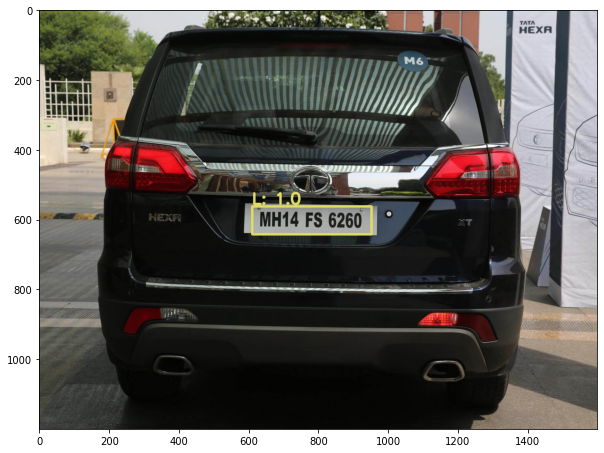

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,15.0)
'''Image Size'''
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.show()

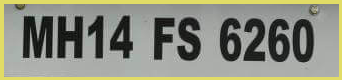

In [ ]:
%matplotlib inline
crop_image = image_input[y_min:y_min + box_height, x_min: x_min + box_width]

p = (crop_image.shape)
# bfilter = cv2.bilateralFilter(crop_image, 11, 17, 12) #Noise reduction
# edged = cv2.Canny(bfilter, 30, 200) #Edge detection
new_image = cv2_imshow(crop_image)




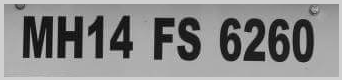

In [ ]:

gray = cv2.cvtColor(crop_image,cv2.COLOR_BGR2GRAY)
# blur = cv2.GaussianBlur(gray, (5, 5),0)
now_image = cv2_imshow(gray)
# backtorgb = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)
# image = cv2_imshow(backtorgb)



In [ ]:
# configr =('--oem 3 -l eng --psm 6 -c tessedit_char_whitelist = ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
text = pytesseract.image_to_string(gray,lang='eng',)
# reader = easyocr.Reader(['en'])
# result = reader.readtext(edged,detail = 0)

In [ ]:
result = text
print(result)
result = ''.join(result)

MH14 FS 6260



In [ ]:
def remove1(text):
  return text.replace("[",",").replace(".","'").replace("]","-").replace(" ","").replace("'","").replace("\n","").replace("\\","").replace('^','').replace('-','')
result = remove1(result)
result = result.upper()
# print(result)
if(re.search('[A-Z]{2}[0-9]{2}[A-Z]{2}[0-9]{4}',result)):
   plate_format = re.search('[A-Z]{2}[0-9]{2}[A-Z]{2}[0-9]{4}',result)
   output =  plate_format.group(0)
   print(output)
elif(re.search('[A-Z]{2}[0-9]{2}[A-Z]{1}[0-9]{4}',result)):
  plate_format = re.search('[A-Z]{2}[0-9]{2}[A-Z]{1}[0-9]{4}',result)
  output =  plate_format.group(0)
  print(output)
elif(re.search('[A-Z]{2}[0-9]{2}[A-Z]{1}[0-9]{4}',result)):
  plate_format = re.search('[A-Z]{2}[0-9]{2}[A-Z]{2}[0-9]{3}',result)
  output =  plate_format.group(0)
  print(output)



MH14FS6260


In [ ]:
## TESSERACT PACKAGE
# !apt-get install libleptonica-dev tesseract-ocr libtesseract-dev python3-pil tesseract-ocr-eng tesseract-ocr-script-latn


In [ ]:
# !pip install pytesseract



In [ ]:
# pip install Pillow==9.0.0

In [1]:
git init 

# pip install easyocr

SyntaxError: ignored